In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
# reading csv file as pandas dataframe
data = pd.read_csv('headbrain.csv')
data

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [11]:
# collecting x & y
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

# calculate mean of x & y using an inbuilt numpy method mean()
mean_x = np.mean(X)
mean_y = np.mean(Y)

3633.9915611814345


In [12]:
# total no.of input values
val_count = len(X)

# using the formula to calculate m & c
numer = 0
denom = 0
for i in range(val_count):
  numer += (X[i] - mean_x) * (Y[i] - mean_y)
  denom += (X[i] - mean_x) ** 2
m = numer / denom
c = mean_y - (m * mean_x)

print (f'm = {m} \nc = {c}')

m = 0.26342933948939945 
c = 325.57342104944223


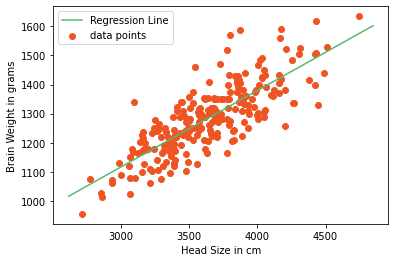

In [6]:
# plotting values and regression line
max_x = np.max(X) + 100
min_x = np.min(X) - 100

# calculating line values x and y
x = np.linspace (min_x, max_x, 100)
y = c + m * x

plt.plot(x, y, color='#58b970', label='Regression Line')
plt.scatter(X,Y,c='#ef5423', label='data points')

plt.xlabel('Head Size in cm')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [7]:
# calculating R-squared value for measuring goodness of our model. 
ss_t = 0 #total sum of squares
ss_r = 0 #total sum of square of residuals

for i in range(int(val_count)):
  y_pred = c + m * X[i]
  ss_t += (Y[i] - mean_y) ** 2
  ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)

print(r2)

0.6393117199570003


In [8]:
# Linear regression implementation using sklearn

from sklearn.linear_model import LinearRegression

X = X.reshape(-1, 1)
reg = LinearRegression()
reg = reg.fit(X,Y)

Y_pred = reg.predict(X)
r2_square = reg.score(X, Y)

print (r2_square)

0.639311719957


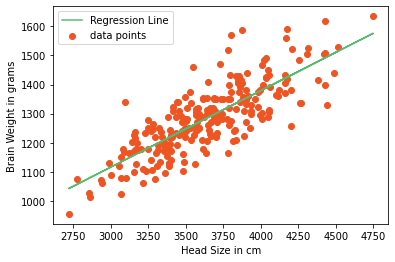

In [9]:
plt.plot(X, Y_pred, color='#58b970', label='Regression Line')
plt.scatter(X,Y,c='#ef5423', label='data points')

plt.xlabel('Head Size in cm')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()